# 0. Introduction

Introduction:

Nous avons decide de mener une etude sur un fichier nomme data que nous avons scincer en 4. Ce fichier contient un nombre de 4877 ligne.

En effet ce fichier designe un ensemble d'individu carterise par des attributs ( statemb, Age, School12...), comme ceci est explique en details ci-dessous.
Ces personnes se trouvent actuellement au chomage  pour divers raisons( Joblost), appartenant a differents Etats des Unis.

Nous avons donc orienter notre etude sur certaine colone specifique comme ceci est indique dans les fonctions detaillees dans le  script<spark.py>.

Chaque data set (.csv) representera un nombre de personnes ayant perdu leur emploi par Mois, et de maniere respective, les data sets data1, dat2, data3, data4 sont les premier, deuxieme, troisieme, et quatrieme Mois.


## 1. Importation des librairies

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Importation et lecture des donnees

In [2]:
df = pd.read_csv('./data/donnees/data1.csv')
df.head()

,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,...,dkids,dykids,yrdispl,rr,head,ui,portfolio,derivatives,insurance,Sharpe
0,4.5,167,42,49,21,other,no,no,male,yes,...,no,no,7,0.290631,yes,yes,no,no,no,0.000000
1,10.5,251,55,26,2,slack_work,no,no,male,yes,...,yes,yes,10,0.520202,yes,no,yes,yes,yes,1.040404
2,7.2,260,21,40,19,other,no,yes,female,yes,...,no,no,10,0.432490,yes,yes,no,no,no,0.000000
3,5.8,245,56,51,17,slack_work,yes,no,female,yes,...,no,no,10,0.500000,no,yes,no,no,no,0.000000
4,6.5,125,58,33,1,slack_work,no,yes,male,yes,...,yes,yes,4,0.390625,yes,no,yes,yes,yes,0.781250


In [3]:
print("la Structure globe de la  dataframe: ", df.shape)

la Structure globe de la  dataframe:  (1001, 22)


## 3. Traitement des Donnees

###  3.1 Suppression de Colonne non essentielles

In [4]:
df.drop(['nwhite'], axis =1, inplace = True)

In [5]:
df.drop(['dykids'], axis =1, inplace = True)

In [6]:
df.drop(['rr'], axis =1, inplace = True)

In [7]:
df.drop(['ui'], axis =1, inplace = True)

In [8]:
df.drop(['bluecol'], axis =1, inplace = True)

In [9]:
df.drop(['derivatives'], axis =1, inplace = True)

In [10]:
df.drop(['Sharpe'], axis =1, inplace = True)

In [11]:
df.drop(['smsa'], axis =1, inplace = True)

In [12]:
df.drop(['statemb'], axis =1, inplace = True)

In [13]:
df.drop(['portfolio'], axis =1, inplace = True)

### 3.2 Nouvelle Data Frame

In [14]:
df.head()

,stateur,state,age,tenure,joblost,school12,sex,married,dkids,yrdispl,head,insurance
0,4.5,42,49,21,other,no,male,no,no,7,yes,no
1,10.5,55,26,2,slack_work,no,male,no,yes,10,yes,yes
2,7.2,21,40,19,other,yes,female,yes,no,10,yes,no
3,5.8,56,51,17,slack_work,no,female,yes,no,10,no,no
4,6.5,58,33,1,slack_work,yes,male,yes,yes,4,yes,yes


### 3.3 Vérifier  les types de données, les valeurs manquantes, et les statistiques récapitulatives

In [20]:
#donnes des information sur les donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   stateur    1001 non-null   float64
 1   state      1001 non-null   int64  
 2   age        1001 non-null   int64  
 3   tenure     1001 non-null   int64  
 4   joblost    1001 non-null   object 
 5   school12   1001 non-null   object 
 6   sex        1001 non-null   object 
 7   married    1001 non-null   object 
 8   dkids      1001 non-null   object 
 9   yrdispl    1001 non-null   int64  
 10  head       1001 non-null   object 
 11  insurance  1001 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 94.0+ KB


In [16]:
# types de données
df.dtypes

stateur      float64
state          int64
age            int64
tenure         int64
joblost       object
school12      object
sex           object
married       object
dkids         object
yrdispl        int64
head          object
insurance     object
dtype: object

In [17]:
# S'assurer qu il n y a pas de doublons dans les data set
df.duplicated().sum()

0

In [18]:
# verification des valeurs manquantes
df.isnull().sum()


stateur      0
state        0
age          0
tenure       0
joblost      0
school12     0
sex          0
married      0
dkids        0
yrdispl      0
head         0
insurance    0
dtype: int64

Hourra, pas de valeurs manquantes!

Remarque: Le cas echeant serait bien evidement traite !!!!

In [22]:
# compte le type des valeurs

df.dtypes.value_counts()

object     7
int64      4
float64    1
dtype: int64

Nous avons 7 variables catégorielles et 5 variables numériques.

In [25]:
# statistiques récapitulatives

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stateur,1001.0,7.286613,2.476675,2.5,5.6,7.0,8.9,18.0
state,1001.0,52.340659,25.532270,11.0,31.0,55.0,74.0,95.0
age,1001.0,36.216783,10.769306,20.0,27.0,35.0,44.0,61.0
tenure,1001.0,5.657343,6.451160,1.0,2.0,3.0,7.0,39.0
yrdispl,1001.0,5.718282,3.122908,1.0,3.0,6.0,9.0,10.0


### 3.4 Feature engineering
L'ingénierie d'entités est le processus de création de nouvelles entités à l'aide d'entités existantes dans le jeu de données. Dans cette section, je vais créer 1 nouvelles fonctionnalités:

- age_category

In [28]:
# Creation d'un colonne categorie d age nomme :age_category

df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_category'] = 'youth'
df.loc[(df['age'] >= 36) & (df['age'] <= 55), 'age_category'] = 'adults'
df.loc[df['age'] > 55, 'age_category'] = 'seniors'
df['age_category'].value_counts()

youth      534
adults     401
seniors     66
Name: age_category, dtype: int64

In [27]:
#Verification
df.head()

,stateur,state,age,tenure,joblost,school12,sex,married,dkids,yrdispl,head,insurance,age_category
0,4.5,42,49,21,other,no,male,no,no,7,yes,no,adults
1,10.5,55,26,2,slack_work,no,male,no,yes,10,yes,yes,youth
2,7.2,21,40,19,other,yes,female,yes,no,10,yes,no,adults
3,5.8,56,51,17,slack_work,no,female,yes,no,10,no,no,adults
4,6.5,58,33,1,slack_work,yes,male,yes,yes,4,yes,yes,youth


## 4. Description des données

Voici la description des colonnes de l'ensemble de données:
- Stateur : state unemployment rate (in %) --> taux de chômage de l'État (en%)
- State : state of residence code           -->  code de l'État de résidence
- Age   : age in years                      --> âge en années 
- Tenure : years of tenure in job lost      --> années d'ancienneté dans l'emploi perdues
- Joblost: a factor with levels (slack\_work, position\_abolished,seasonal\_job\_ended,other)-->  un facteur avec des niveaux
- school12: more than 12 years of school    --> plus de 12 ans d'école
- sex: a factor with levels (male,female)   --> un facteur avec des niveaux (masculin, féminin)
- married : married ?                       --> marié?
- dkids   : has kids ?                      --> a des enfants?
- yrdispl : year of job displacement (2010=1,..., 2020=10) --> année de suppression d'emploi.
- head    : is head of household ?          -->     est le chef de famille?
- insurance : has a insurance               --> a une assurance
- age_category : Age category               --> categorie d age

In [29]:
# S'assurer qu il n y a pas de doublons dans les data set
df.duplicated().sum()

0

In [30]:
# verification des valeurs manquantes
df.isnull().sum()

stateur         0
state           0
age             0
tenure          0
joblost         0
school12        0
sex             0
married         0
dkids           0
yrdispl         0
head            0
insurance       0
age_category    0
dtype: int64

In [31]:
# types de données

df.dtypes

stateur         float64
state             int64
age               int64
tenure            int64
joblost          object
school12         object
sex              object
married          object
dkids            object
yrdispl           int64
head             object
insurance        object
age_category     object
dtype: object

Exportation du fichier nettoyer sous le nom de data1_clean.csv


In [32]:
df.to_csv('./data/donnees/data1_clean.csv')

## 5. Visualisation


Avant de visualiser les caractéristiques de notre jeu de données, il est toujours recommandé de classer d'abord ces caractéristiques comme catégoriques ou numériques. En effet, les valeurs d'une variable catégorielle sont discrètes alors que les valeurs d'une variable numérique sont continues. Par conséquent, ils auront besoin de différentes parcelles afin de les visualiser de manière significative.

Dans cette section, nous examinerons les différents graphiques disponibles dans Seaborn pour visualiser les variables catégorielles ainsi que les variables numériques.

Pour les variables catégorielles, nous avons:

- sns.countplot
- sns.catplot (anciennement sns.factorplot)

Pour les variables numériques, nous avons:

- sns.boxplot
- sns.distplot
- sns.kdeplot

### 5.1 Categorical variables

Rappelez-vous que les variables catégorielles de notre ensemble de données incluent:
- joblost
- school12
- sex
- married
- dkids
- head
- insurance
- age_category


### 5.1.1 sns.countplot

Countplot montre simplement le nombre de chaque valeur dans une colonne.

###### Nous allons visualiser quelques unes de ces variables

In [33]:
# Pour Joblost
df['joblost'].value_counts()

slack_work            489
other                 397
position_abolished     76
seasonal_job_ended     39
Name: joblost, dtype: int64

Text(0.5, 1.0, 'Joblost Value Counts')

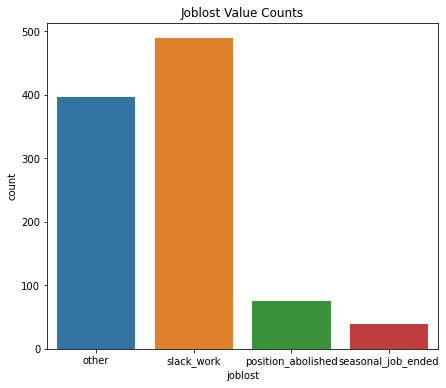

In [35]:
plt.figure(figsize = (7, 6))
sns.countplot(df['joblost'])
plt.title('Joblost Value Counts')

In [36]:
#pour School12
df['school12'].value_counts()

no     814
yes    187
Name: school12, dtype: int64

Text(0.5, 1.0, 'School12 Value Counts')

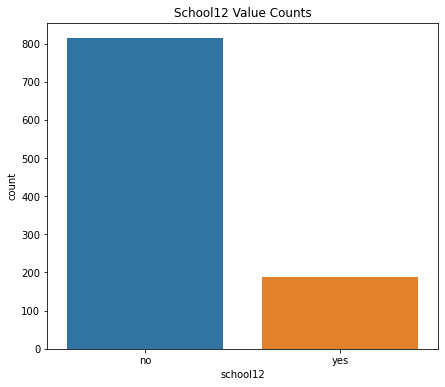

In [37]:
plt.figure(figsize = (7, 6))
sns.countplot(df['school12'])
plt.title('School12 Value Counts')

Nombreux sont ceux qui n'ont pas passé 12 ans a l'ecole dans l'ensemble de données.

In [61]:
#pour Sex
df['sex'].value_counts()

male      774
female    227
Name: sex, dtype: int64

Text(0.5, 1.0, 'SEX Value Counts')

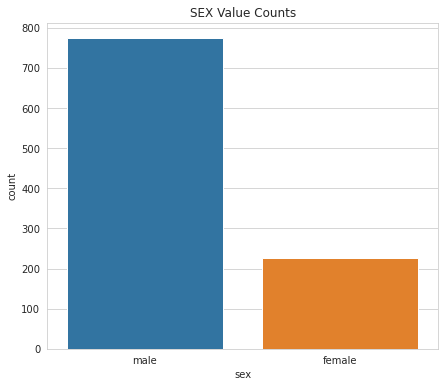

In [62]:
plt.figure(figsize = (7, 6))
sns.countplot(df['sex'])
plt.title('SEX Value Counts')

 Les hommes sont beaucoup plus chomage que les femmes dans l'ensemble de données.

In [47]:
#pour age_category
df['age_category'].value_counts()

youth      534
adults     401
seniors     66
Name: age_category, dtype: int64

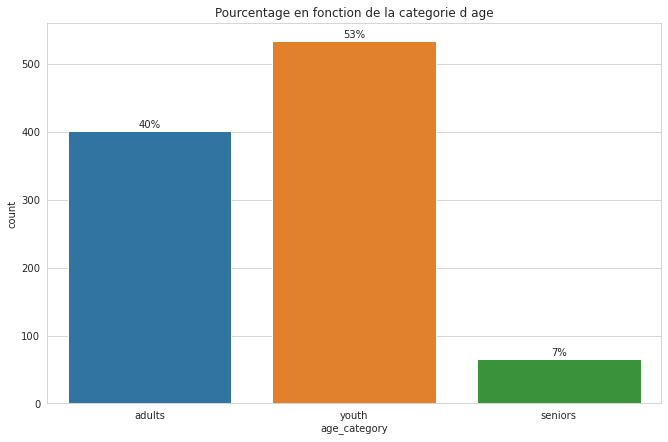

In [60]:
# Countplot with percentage

total = len(df)
plt.figure(figsize = (11, 7))
plt.title('Pourcentage en fonction de la categorie d age')
ax = sns.countplot(x = 'age_category', data = df)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Nous avons au chomage respectivement plus de jeune(youth), apres les Adultes(adults) puis pour finir les Seniors

<AxesSubplot:ylabel='age_category'>

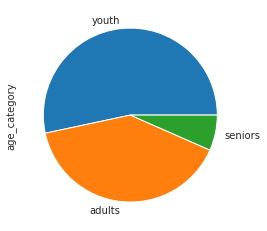

In [93]:
#Un diagramme circulaire de la
#visualisation de la categorie d'age 
df["age_category"].value_counts(normalize=True).plot(kind='pie')

Cette Visualisation avec le camenbert nous comduit au meme resultat.

In [43]:
df['head'].value_counts()

yes    670
no     331
Name: head, dtype: int64

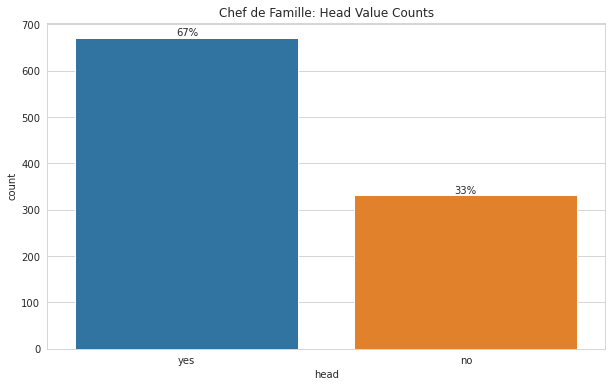

In [59]:
# Countplot with percentage

total = len(df)
plt.figure(figsize = (10, 6))
plt.title('Chef de Famille: Head Value Counts')
ax = sns.countplot(x = 'head', data = df)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Dans l'ensemble de données 67% sont des chef de famille

In [44]:
df['insurance'].value_counts()

no     537
yes    464
Name: insurance, dtype: int64

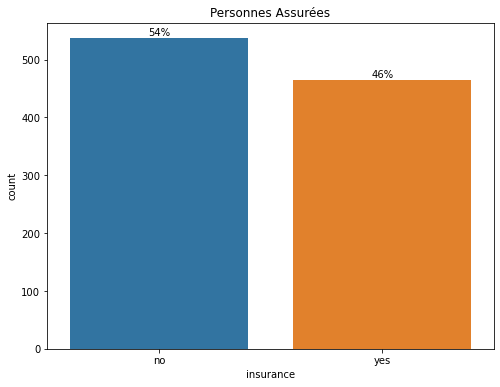

In [49]:
total = len(df)
plt.figure(figsize = (8, 6))
plt.title('Personnes Assurées')
ax = sns.countplot(x = 'insurance', data = df)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Pas trop d'ecart entre ceux qui ont une Assurance et ceux qui ne l'ont pas

### 5.1.2 sns.catplot (anciennement sns.factorplot)

Catplot nous permet de décomposer davantage une variable catégorielle en utilisant une autre variable catégorielle.

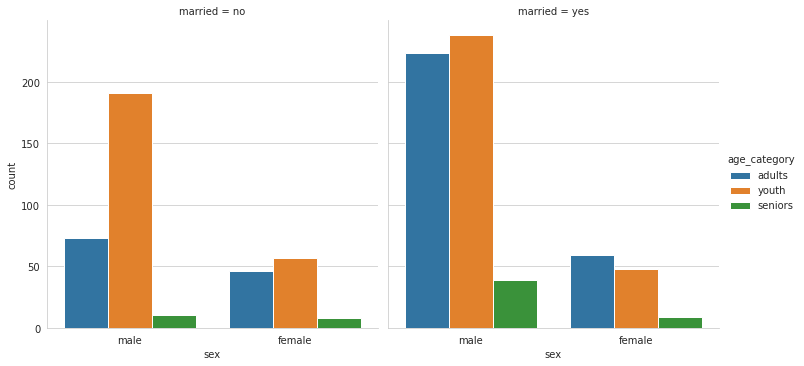

In [51]:
sns.set_style('whitegrid')
sns.catplot('sex', col = 'married', hue = 'age_category', data = df, kind = 'count')

Ici, j'ai divisé la population selon son sexe, son statut social(married?) et sa catégorie d'âge.

Comme nous pouvons l'observer sur le graphique, il y a plus de marié masculins que de feminin. La plupart des mariés appartiennent à la catégorie d'âge des jeunes et des adultes

Ensuite, j'ai divisé la population par sex et par statut de age_categorie.

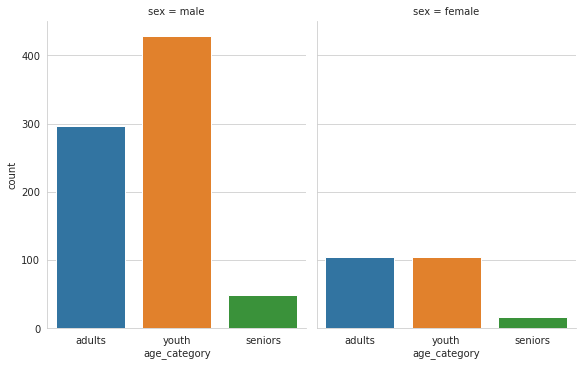

In [58]:
sns.set_style('whitegrid')
sns.catplot(x = 'age_category', col = 'sex', data = df, kind = 'count', aspect = 0.8)

On remarque que chez les femmes les adults et les youth sont a egalite. mais que les seniors reste toujours faiblement represente


### 5.2 Variables numériques

Rappelez-vous que les variables numériques de notre ensemble de données incluent:
- stateur
- state
- age
- tenure
- yrdispl

## 5.2.1 sns.boxplot

Boxplot est l'un des graphiques les plus courants dans les statistiques. Il donne un aperçu de la distribution d'une variable continue.

Text(0.5, 1.0, 'Categorie Age selon le taux de chomage de l etat en (%) ')

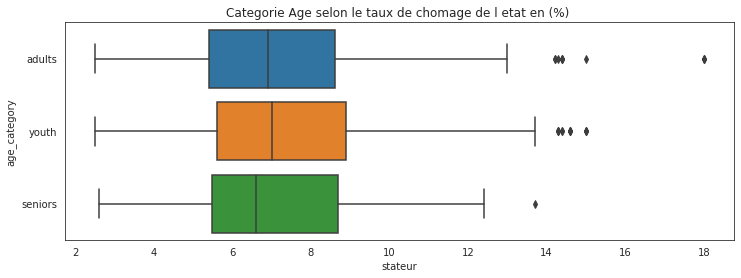

In [69]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
sns.boxplot(y = df['age_category'], x = df['stateur'])
plt.title('Categorie Age selon le taux de chomage de l etat en (%) ')

Comme prévu, le taux de jeunes chomeurs par etat est plus élevée, suit les Adultes et enfin les Seniors

## 5.2.2 sns.distplot

Distplot combine un histogramme avec un lissage de densité de noyau pour illustrer la distribution d'une variable continue.


Text(0.5, 1.0, 'Age Distribution')

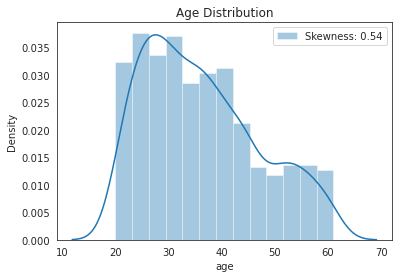

In [73]:
sns.set_style('white')
sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()))
plt.legend(loc = 'best')
plt.title('Age Distribution')

Les State suit une distribution presque normale.


In [74]:
print("Moyenne Age: {:.2f}".format(df['age'].mean()))

Moyenne Age: 36.22


Text(0.5, 1.0, 'Age Distribution')

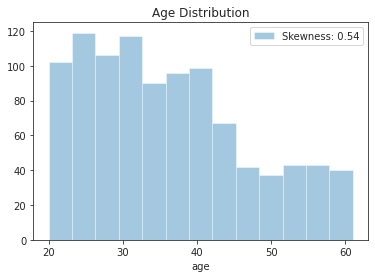

In [82]:
sns.set_style('ticks')
sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()), kde = False)
plt.legend(loc = 'best')
plt.title('Age Distribution')

Remarque: Nous pouvons supprimer l'estimation de la distribution du noyau (kde) de distplot en définissant simplement l'argument kde sur False.

Partie distribution a Revoir

### 5.2.3 sns.kdeplot

En statistique, l'estimation de la distribution par noyau est un moyen non paramétrique d'estimer la fonction de densité de probabilité d'une variable aléatoire continue.

Text(0.5, 1.0, 'Ancienete par Genre')

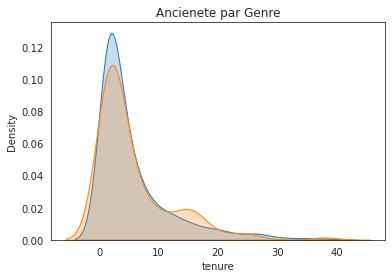

In [86]:
sns.set_style('white')
sns.kdeplot(df.loc[df['sex'] == 'male', 'tenure'], label = 'Male', shade = True)
sns.kdeplot(df.loc[df['sex'] == 'female', 'tenure'], label = 'Female', shade = True)
plt.xlabel('tenure')
plt.title('Ancienete par Genre')

Text(0.5, 1.0, 'yrdispl by Gender')

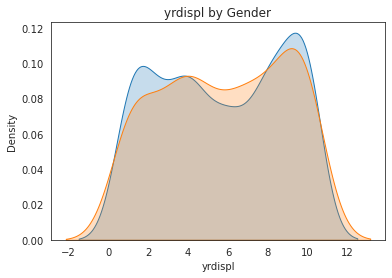

In [96]:
sns.set_style('white')
sns.kdeplot(df.loc[df['sex'] == 'male', 'yrdispl'], label = 'Male', shade = True)
sns.kdeplot(df.loc[df['sex'] == 'female', 'yrdispl'], label = 'Female', shade = True)
plt.xlabel('yrdispl')
plt.title('yrdispl Par Genre')

Text(0.5, 1.0, 'Ancienete par Categorie d Age')

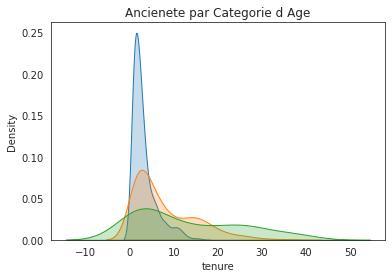

In [89]:
sns.set_style('white')
sns.kdeplot(df.loc[df['age_category'] == 'youth', 'tenure'], label = 'Youth', shade = True)
sns.kdeplot(df.loc[df['age_category'] == 'adults', 'tenure'], label = 'Adults', shade = True)
sns.kdeplot(df.loc[df['age_category'] == 'seniors', 'tenure'], label = 'Seniors', shade = True)
plt.xlabel('tenure')
plt.title('Ancienete par Categorie d Age')


# # 6. Visualisez la relation

## 6.1 Correlation avec sns.heatmap

Une corrélation positive implique que deux variables évoluent dans le même sens. À l'inverse, une corrélation négative implique que deux variables évoluent dans la direction opposée.

Text(0.5, 1.0, 'Correlation entre les variable Numerique')

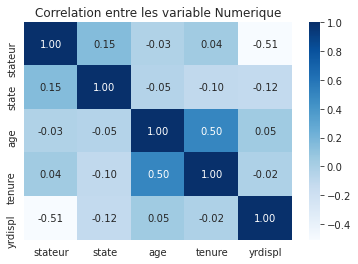

In [92]:
correlation = df[['stateur', 'state', 'age', 'tenure', 'yrdispl']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation entre les variable Numerique')

Resultat: 

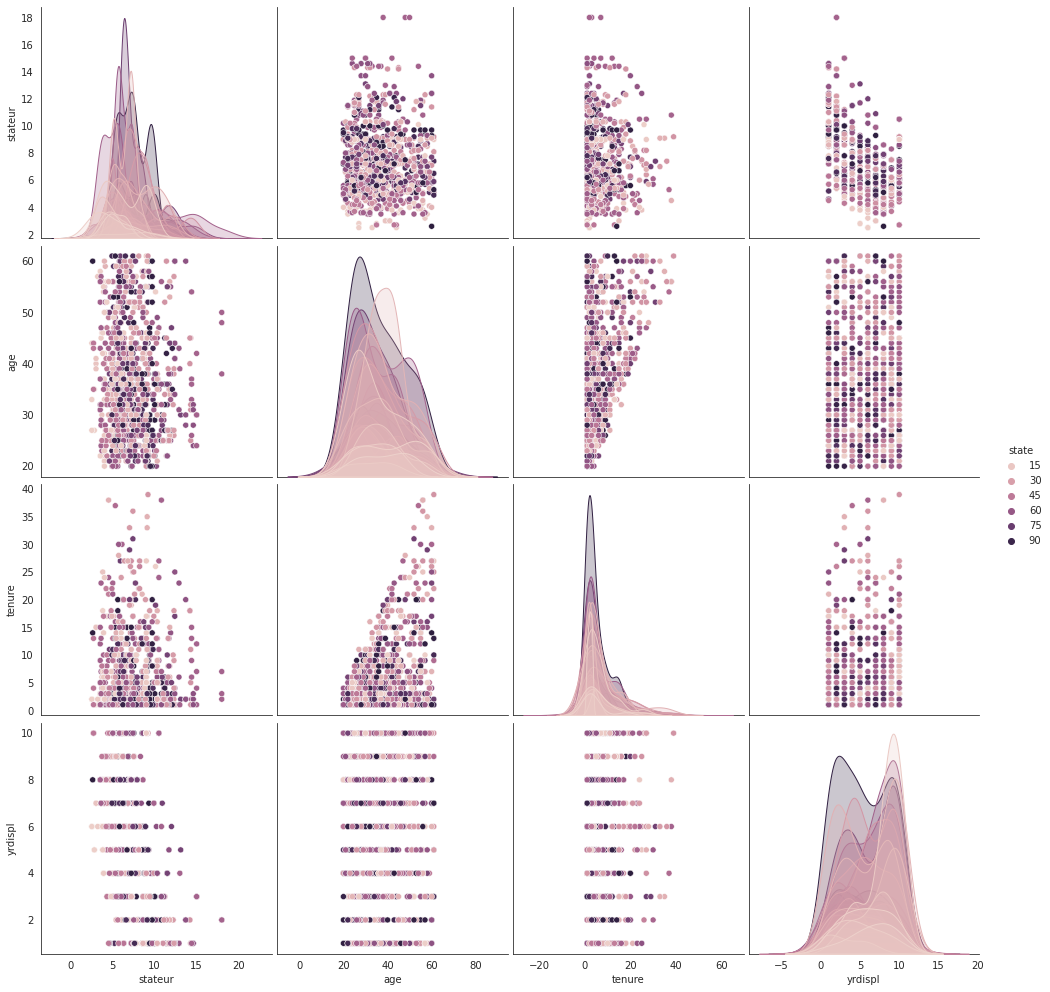

In [99]:
sns.pairplot(df, hue='state', height=3.5)

relation q un State peut avoir avec les autres variable numerique.


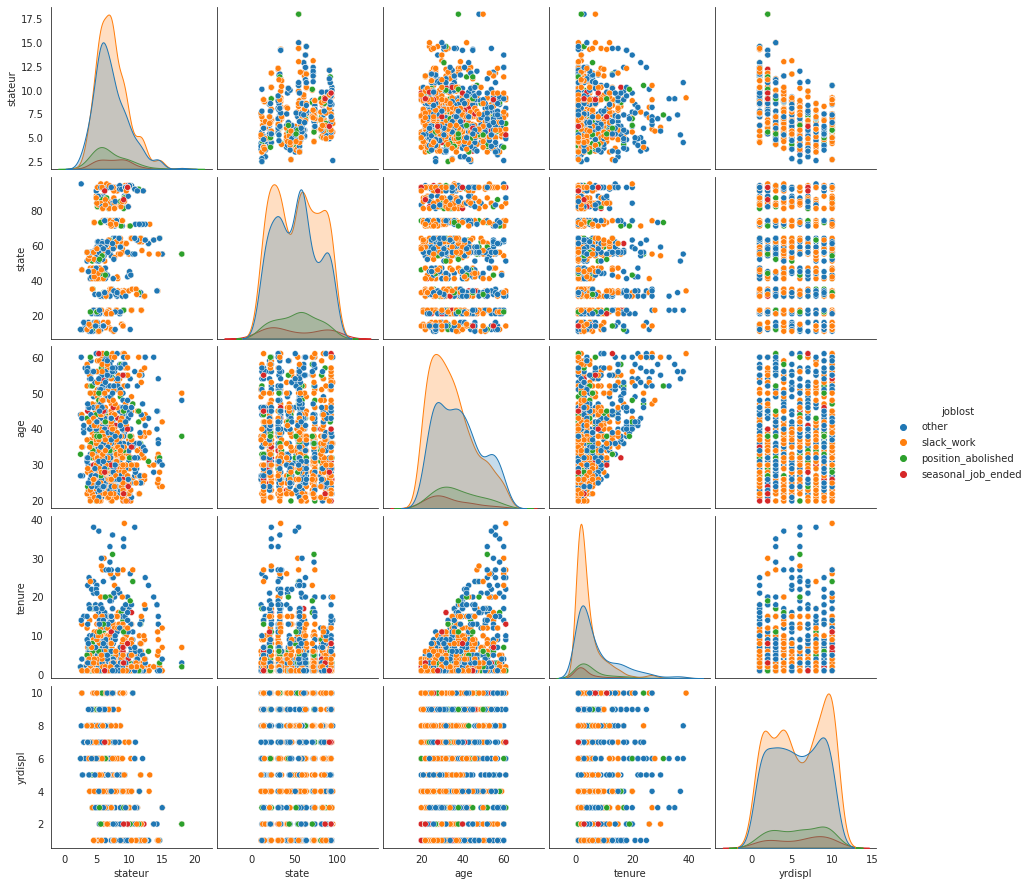

In [129]:
sns.pairplot(df, hue = 'joblost')


Ici, nous pouvons examiner la corrélation entre les raisons de la perte de boulot et les autres variables numériques de notre ensemble de données.

<AxesSubplot:xlabel='age', ylabel='state'>

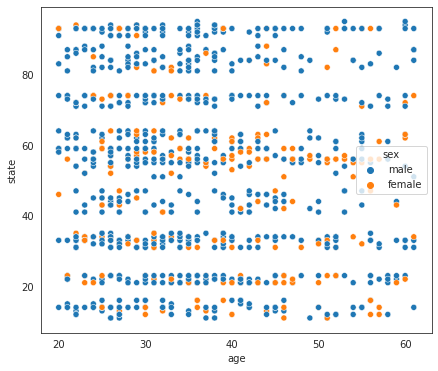

In [115]:
plt.figure(figsize = (7, 6))
sns.scatterplot(x = 'age', y = 'state', hue = 'sex', data = df)

Le nuage de points montre également l'emplacement des points de données entre deux variables numériques distinctes. C'est également un excellent moyen de visualiser et de détecter les valeurs aberrantes dans l'ensemble de données.


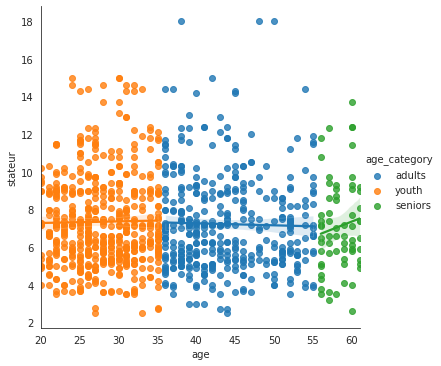

In [120]:
sns.set_style('white')
sns.lmplot(x = 'age', y = 'stateur', hue = 'age_category', data = df)

Cette Visualisation offre la possibilité de catégoriser les points de données en différents groupes.

Text(0.5, 1.0, 'age by sex ')

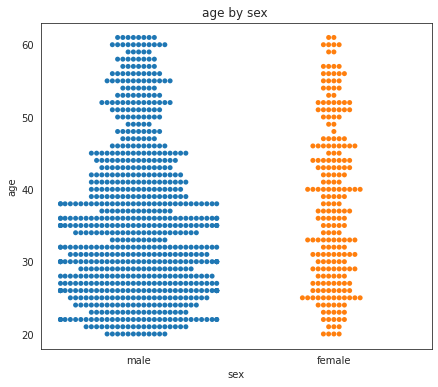

In [121]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.swarmplot(x = df['sex'], y = df['age'])
plt.title('age by sex ')

Swarmplot dessine un nuage de points catégoriel avec des points qui ne se chevauchent pas.